In [187]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
import matplotlib.pyplot as plt

In [188]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [189]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
ab = fetch_ucirepo(id=20) 
df = ab
  
# data (as pandas dataframes) 
X = df.data.features 
y = df.data.targets 
  
# metadata 
print(df.metadata) 
  
# variable information 
print(df.variables) 


{'uci_id': 20, 'name': 'Census Income', 'repository_url': 'https://archive.ics.uci.edu/dataset/20/census+income', 'data_url': 'https://archive.ics.uci.edu/static/public/20/data.csv', 'abstract': 'Predict whether income exceeds $50K/yr based on census data.  Also known as Adult dataset.', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 48842, 'num_features': 14, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Income', 'Education Level', 'Other', 'Race', 'Sex'], 'target_col': ['income'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1996, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5GP7S', 'creators': ['Ron Kohavi'], 'intro_paper': None, 'additional_info': {'summary': 'Extraction was done by Barry Becker from the 1994 Census database.  A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && 

In [190]:
X.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba


In [191]:
missing_values_X = X.isnull().sum()
missing_values_y = y.isnull().sum()
missing_values_X


age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
dtype: int64

In [192]:
categorical_columns = ['workclass', 'occupation', 'native-country']

# Iterate over the columns
for col in categorical_columns:
    # Calculate the mode of the column
    mode_value = X[col].mode()[0]
    # Fill missing values with the mode
    X[col].fillna(mode_value, inplace=True)


C:\Users\lukef\AppData\Local\Temp\ipykernel_4836\4161916024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mode_value, inplace=True)
C:\Users\lukef\AppData\Local\Temp\ipykernel_4836\4161916024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mode_value, inplace=True)
C:\Users\lukef\AppData\Local\Temp\ipykernel_4836\4161916024.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col].fillna(mode_valu

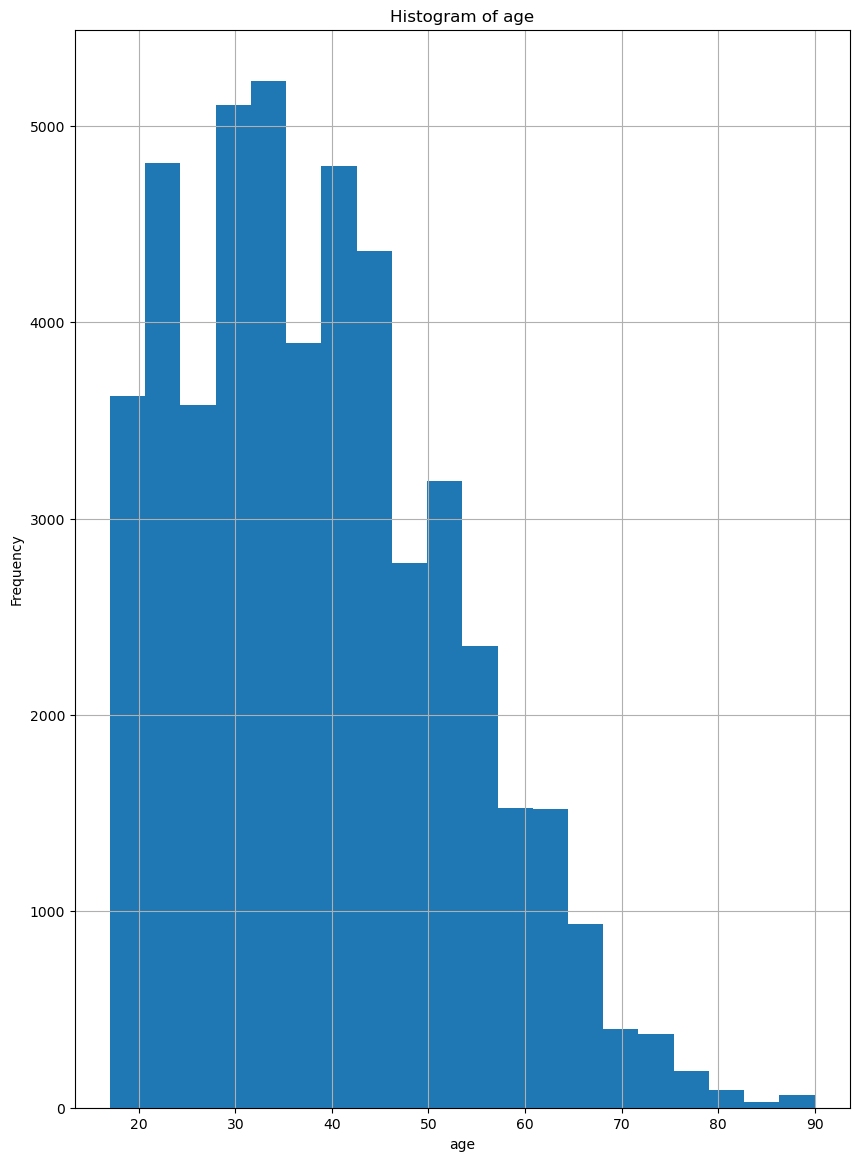

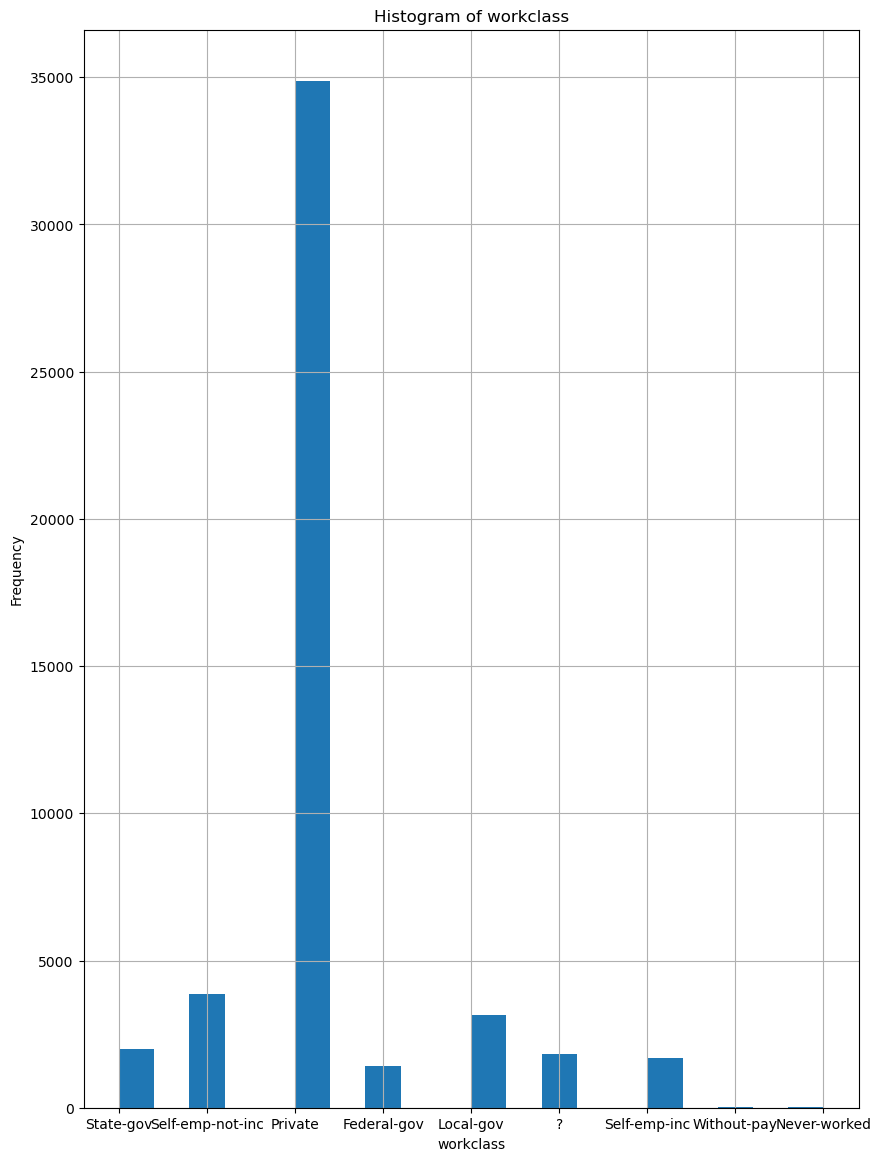

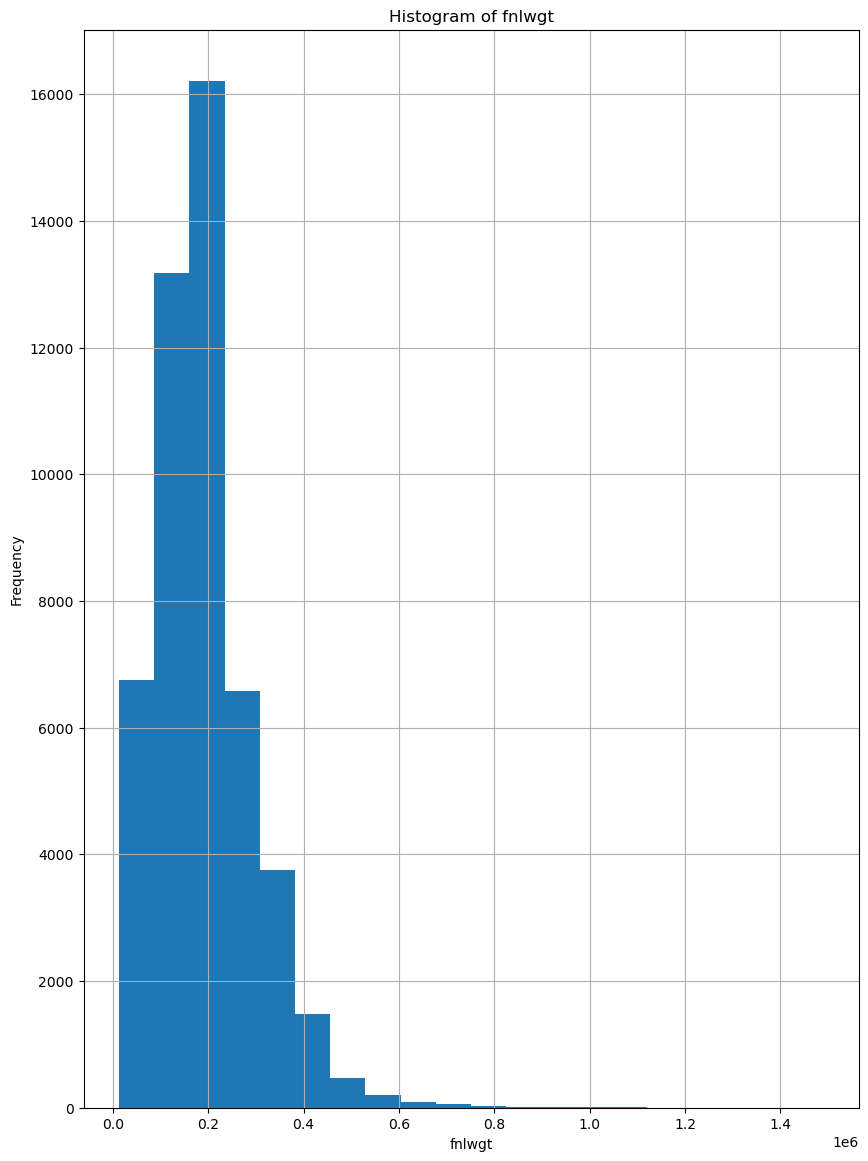

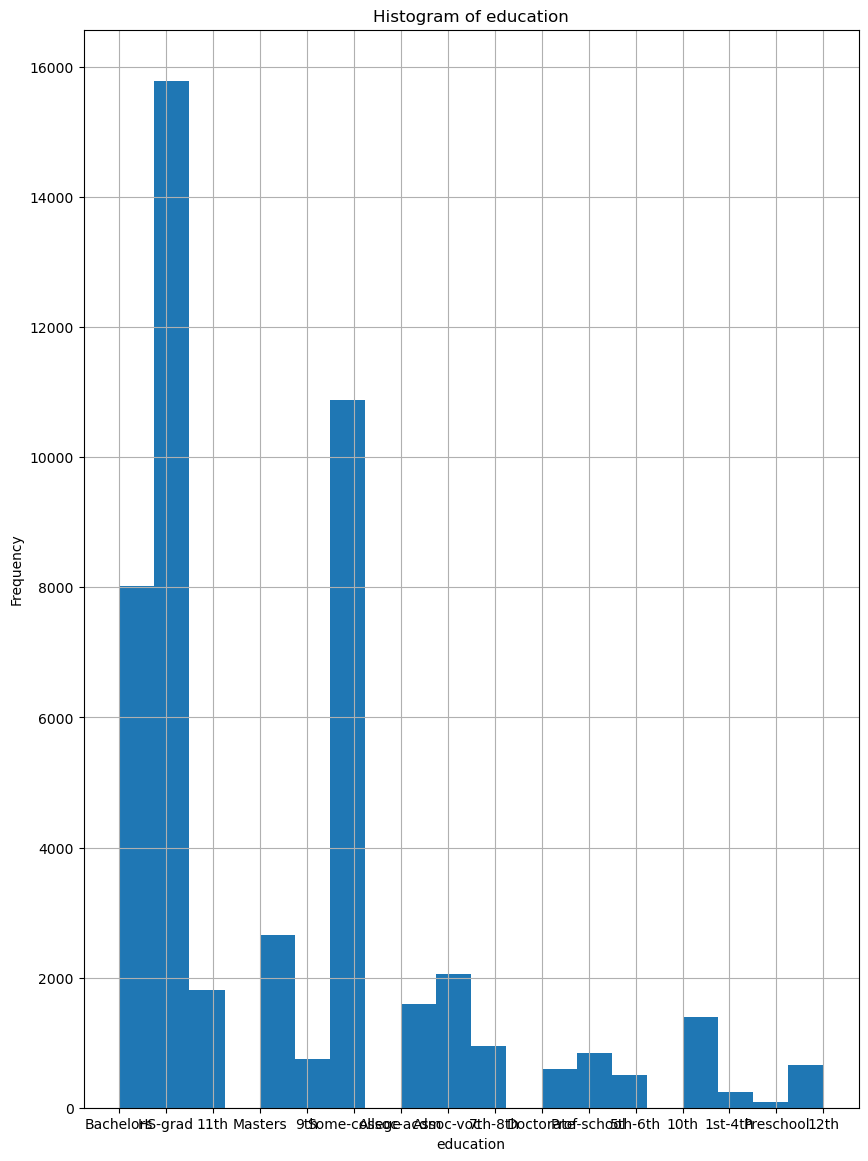

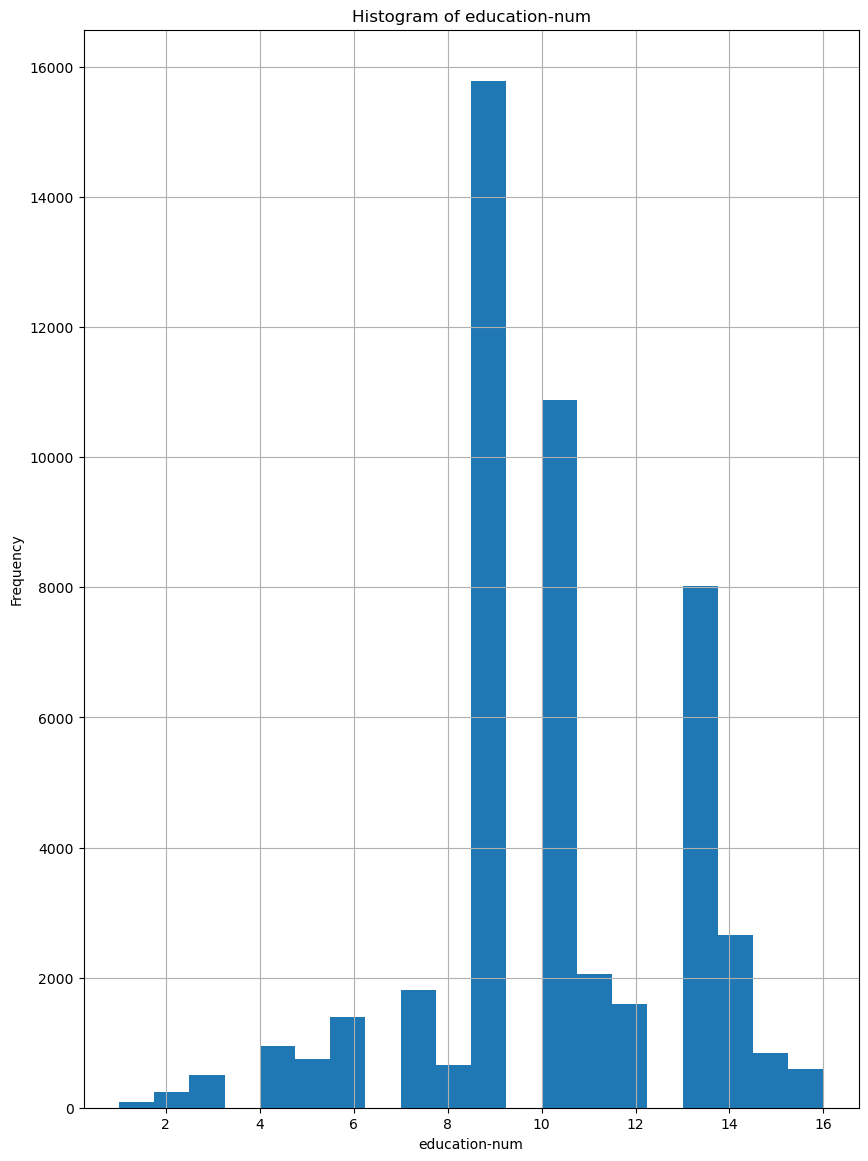

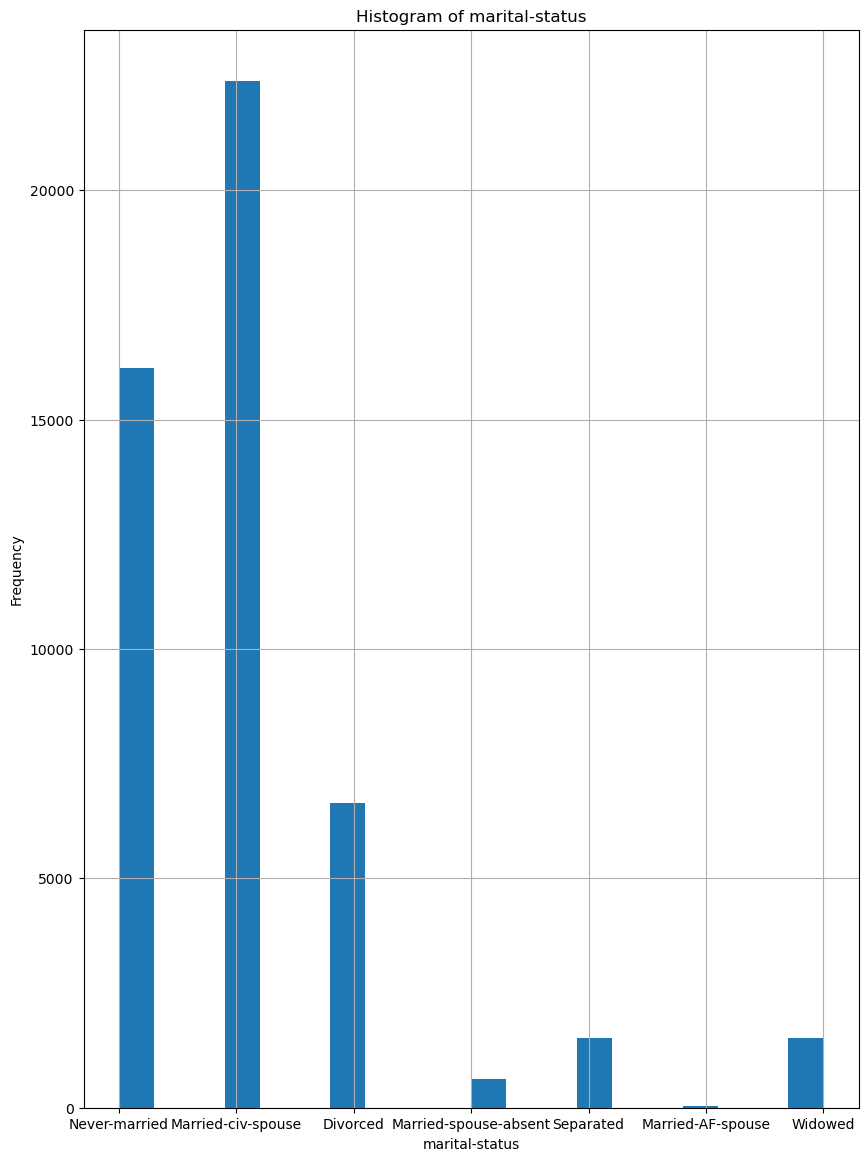

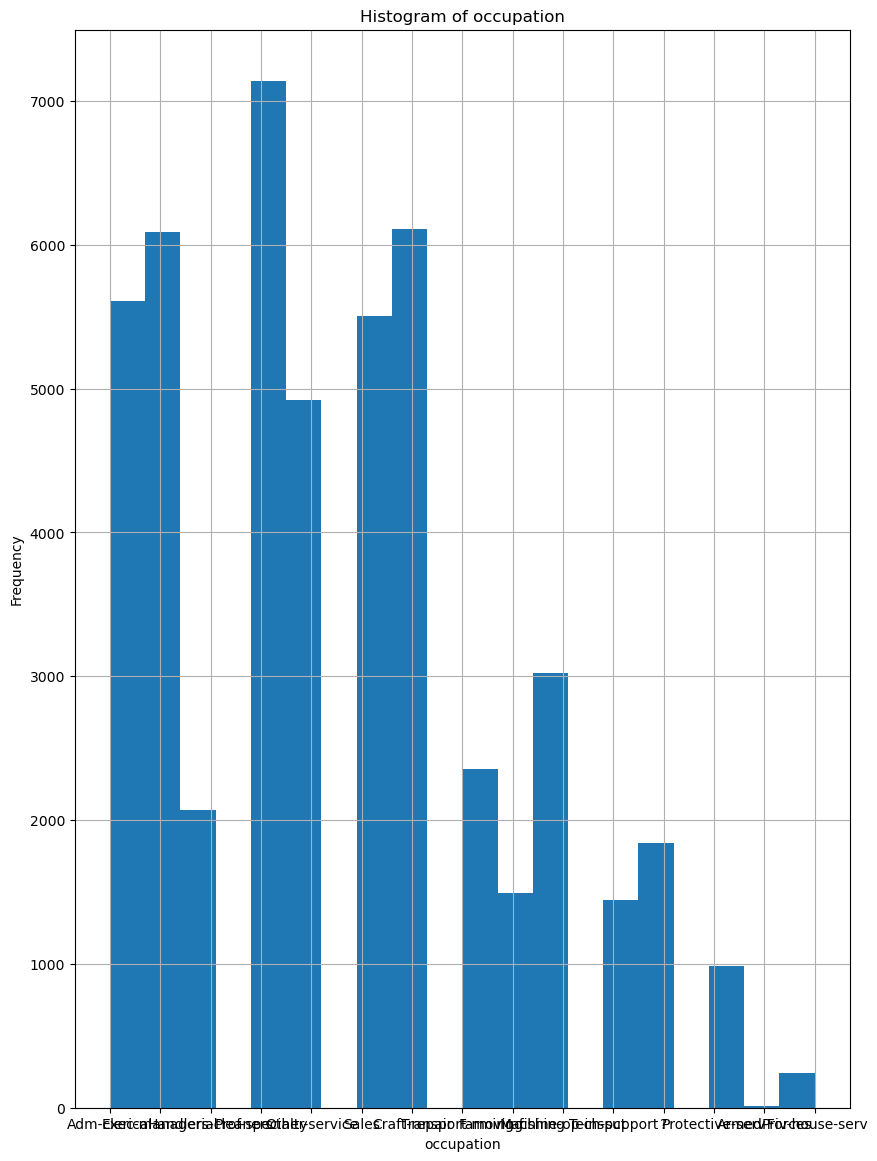

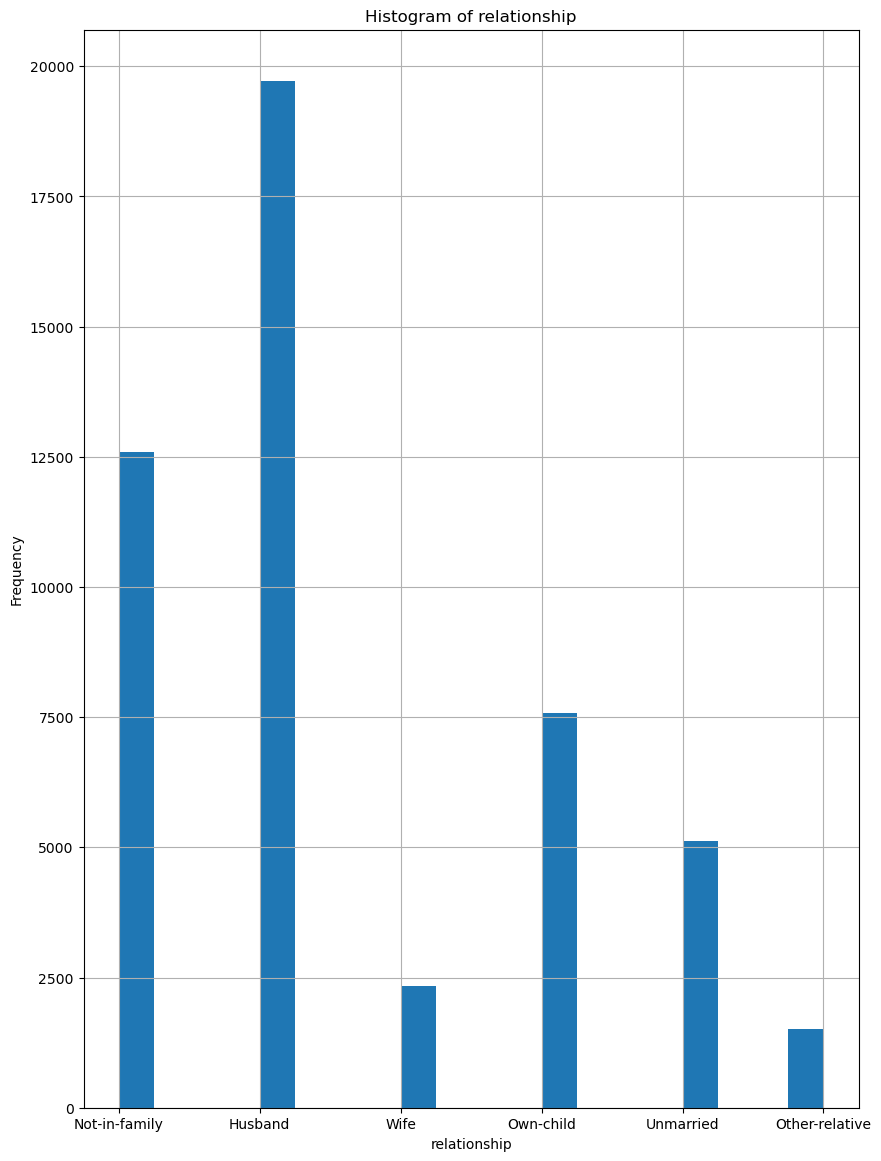

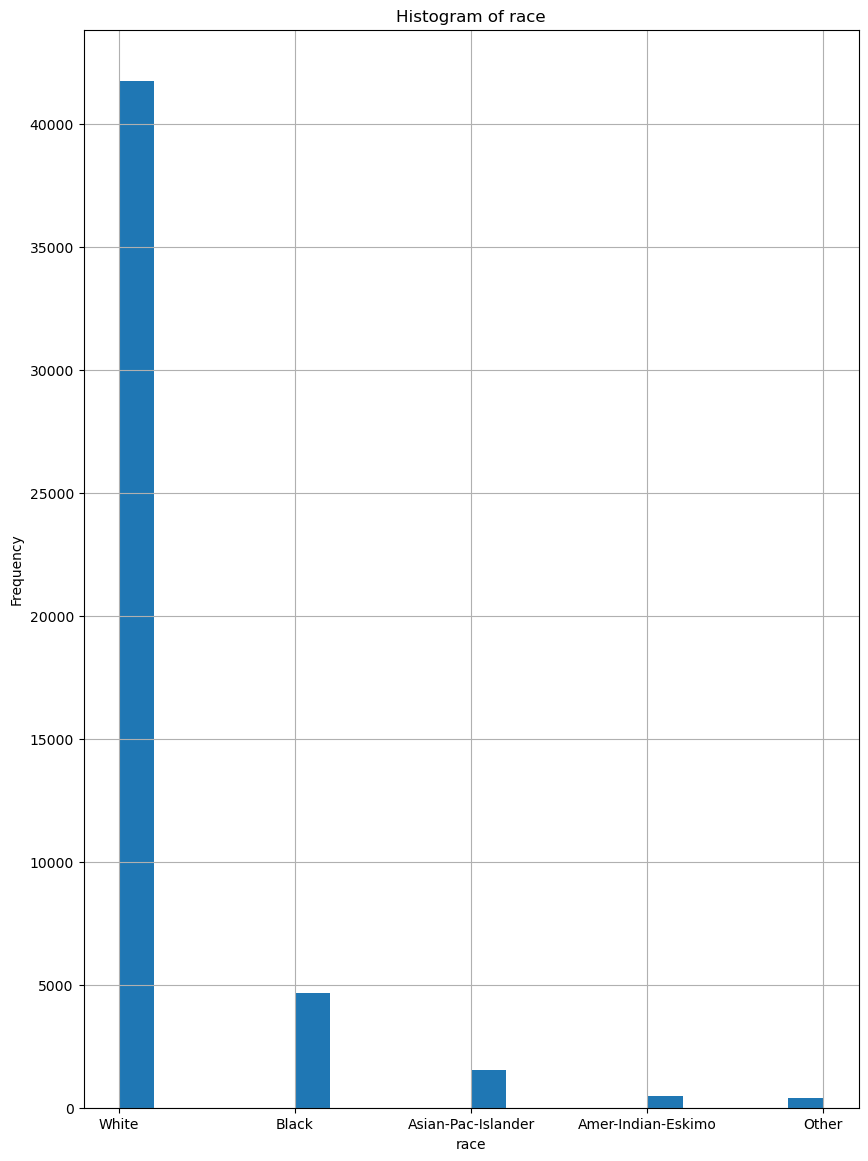

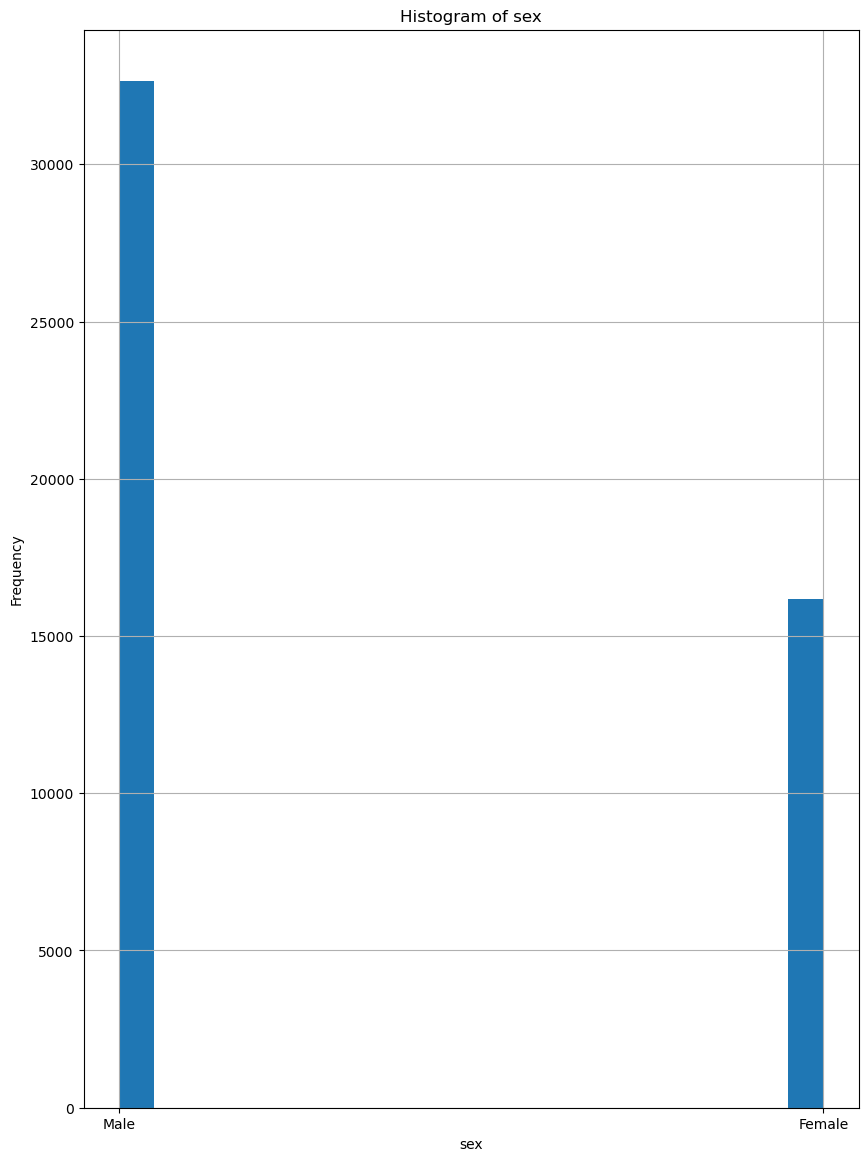

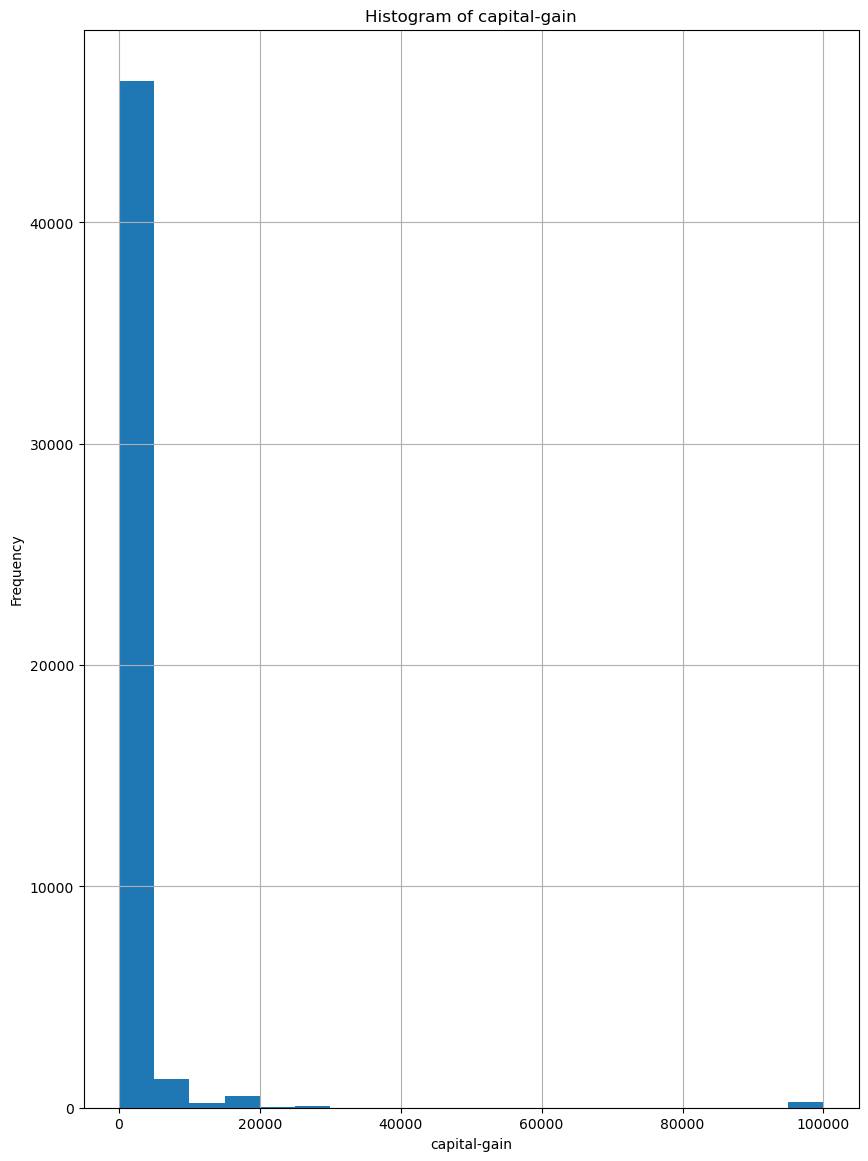

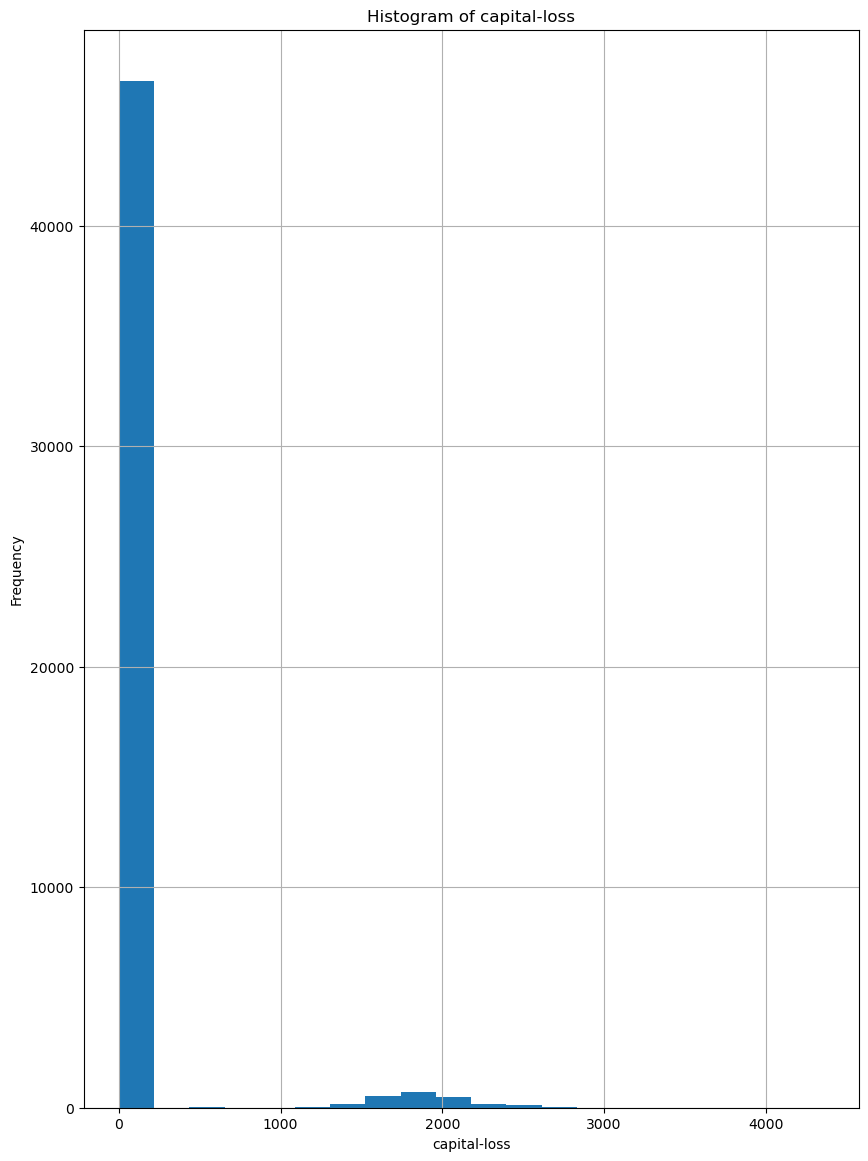

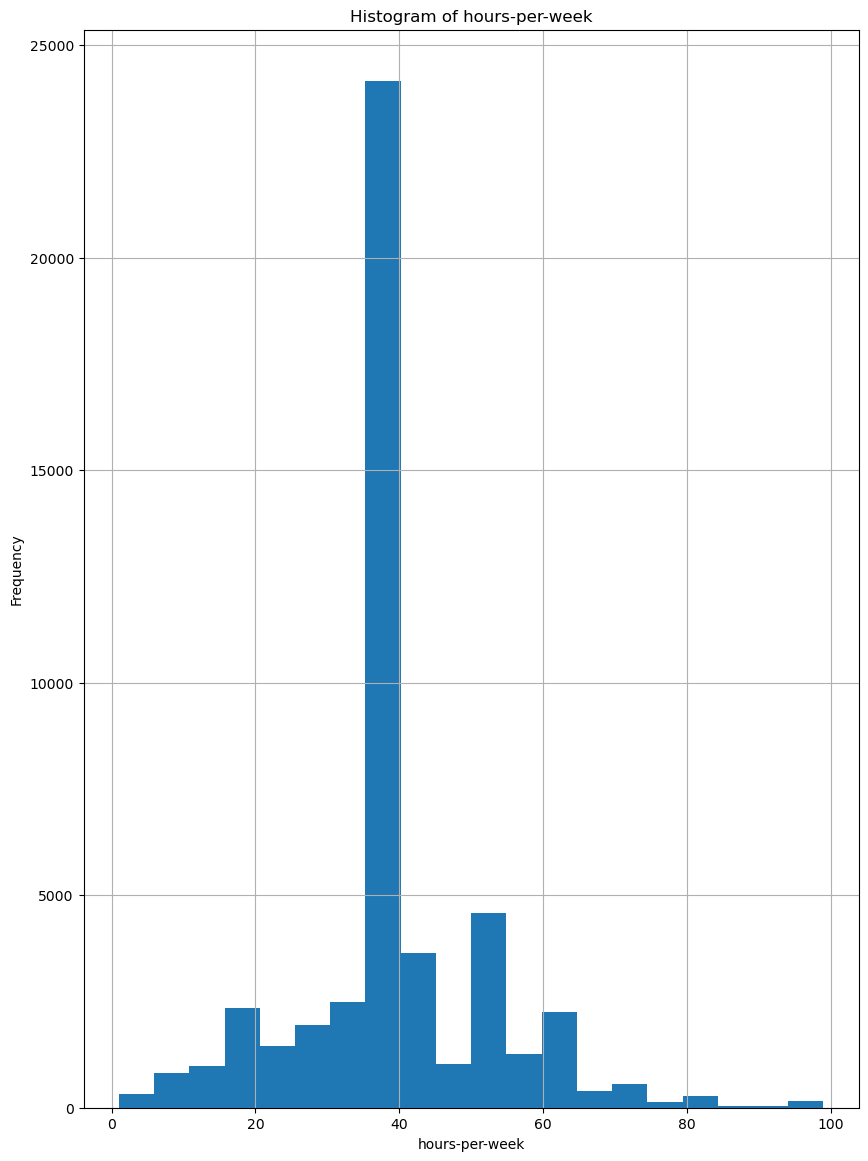

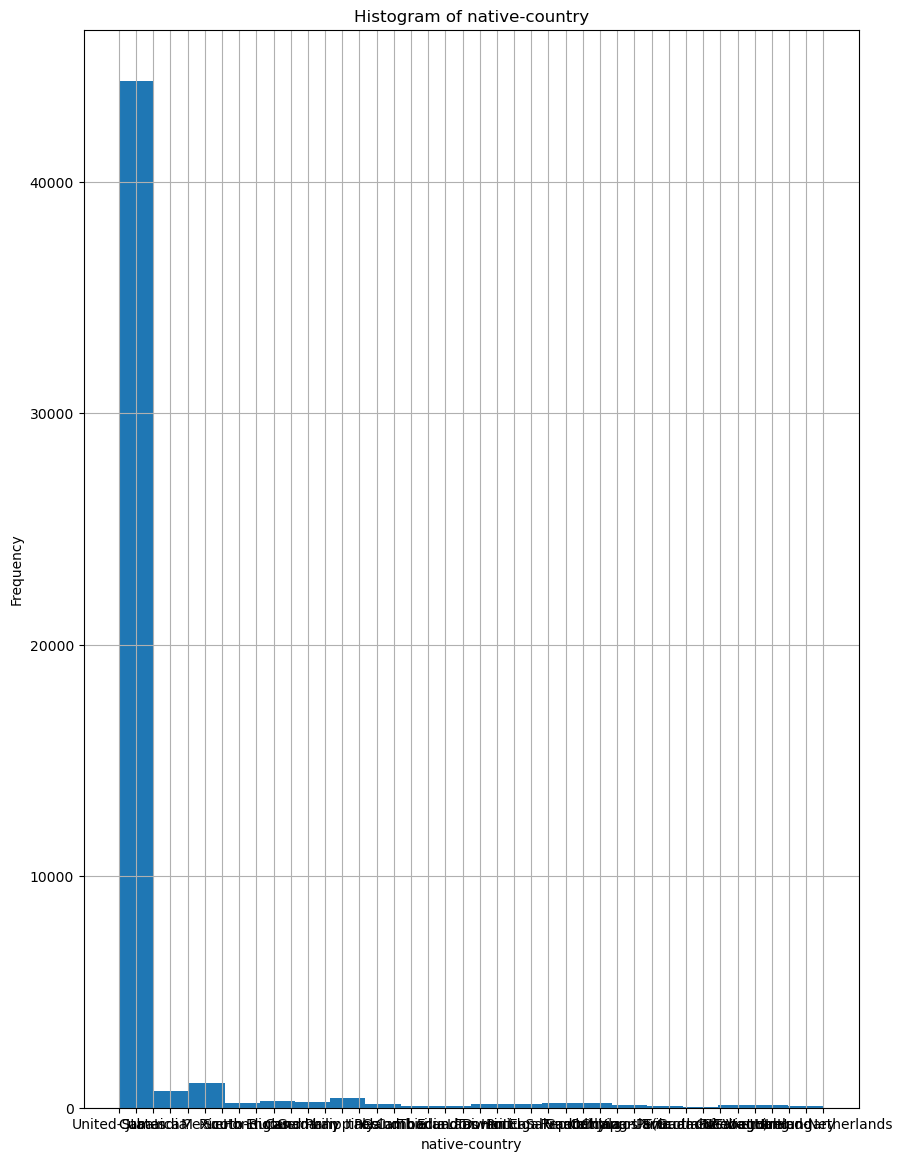

In [193]:


for column in X.columns:
    # Create a histogram for the column
    plt.figure(figsize=(10, 14))
    X[column].hist(bins=20)
    
    # Set the title and labels for the histogram
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    # Display the histogram
    plt.show()

education:   ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 'Assoc-voc' '7th-8th' 'Doctorate' 'Prof-school' '5th-6th' '10th'
 '1st-4th' 'Preschool' '12th']



C:\Users\lukef\AppData\Local\Temp\ipykernel_4836\1416630128.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['education'] = pd.Categorical(X['education'], categories=preferred_order, ordered=True)


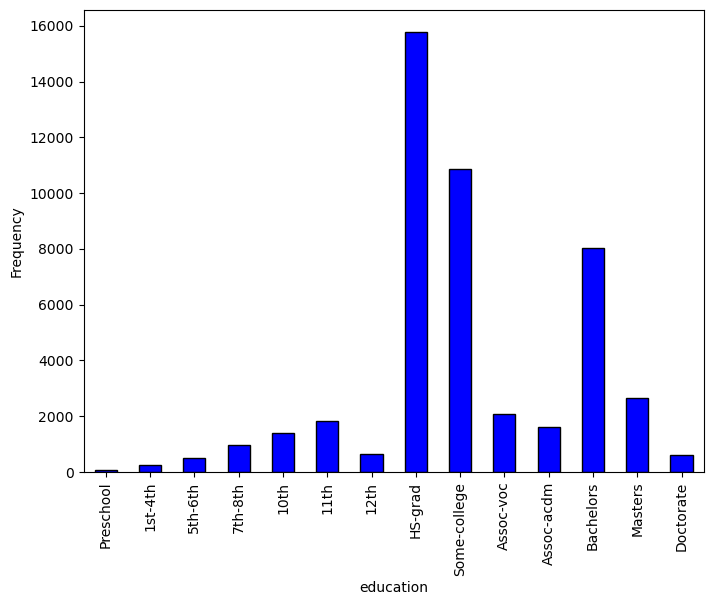

In [194]:
from sklearn.model_selection import train_test_split
unique_values2 = X['education'].unique()
print("education:  ",unique_values2)
print()
column_name = 'education'
preferred_order = ['Preschool', '1st-4th','5th-6th','7th-8th','10th','11th','12th','HS-grad','Some-college','Assoc-voc','Assoc-acdm','Bachelors','Masters','Doctorate']
X['education'] = pd.Categorical(X['education'], categories=preferred_order, ordered=True)

plt.figure(figsize=(8, 6))
X['education'].value_counts(sort=False).plot(kind='bar', color='blue', edgecolor='black')
plt.xlabel('education')
plt.ylabel('Frequency')
plt.show()

In [195]:
# # Mapping dictionary
# mapping_dict = {'>50k': 1, '<50k': 0}

# # Apply the mapping to the target column
# y['income'] = y['income'].map(mapping_dict)
y['income'] = y['income'].str.strip('. ').str.strip()


C:\Users\lukef\AppData\Local\Temp\ipykernel_4836\912357023.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'] = y['income'].str.strip('. ').str.strip()


In [196]:
y['income'].replace({'>50K': 1, '<=50K': 0}, inplace=True)

C:\Users\lukef\AppData\Local\Temp\ipykernel_4836\2788781538.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['income'].replace({'>50K': 1, '<=50K': 0}, inplace=True)


In [197]:
y['income'].value_counts()

0    37155
1    11687
Name: income, dtype: int64

In [198]:
print(df.variables) 

              name     role         type      demographic  \
0              age  Feature      Integer              Age   
1        workclass  Feature  Categorical           Income   
2           fnlwgt  Feature      Integer             None   
3        education  Feature  Categorical  Education Level   
4    education-num  Feature      Integer  Education Level   
5   marital-status  Feature  Categorical            Other   
6       occupation  Feature  Categorical            Other   
7     relationship  Feature  Categorical            Other   
8             race  Feature  Categorical             Race   
9              sex  Feature       Binary              Sex   
10    capital-gain  Feature      Integer             None   
11    capital-loss  Feature      Integer             None   
12  hours-per-week  Feature      Integer             None   
13  native-country  Feature  Categorical            Other   
14          income   Target       Binary           Income   

                       

In [199]:
cat_variables = ['workclass',
'education',
'marital-status',
'occupation',
'relationship',
'race',
'native-country'
]

one_hot_variables=[]
for cat in cat_variables:
    print(X[cat].value_counts())
    if X[cat].value_counts().size > 2:
        one_hot_variables.append(cat)
    

print(one_hot_variables)    

Private             34869
Self-emp-not-inc     3862
Local-gov            3136
State-gov            1981
?                    1836
Self-emp-inc         1695
Federal-gov          1432
Without-pay            21
Never-worked           10
Name: workclass, dtype: int64
HS-grad         15784
Some-college    10878
Bachelors        8025
Masters          2657
Assoc-voc        2061
11th             1812
Assoc-acdm       1601
10th             1389
7th-8th           955
12th              657
Doctorate         594
5th-6th           509
1st-4th           247
Preschool          83
Name: education, dtype: int64
Married-civ-spouse       22379
Never-married            16117
Divorced                  6633
Separated                 1530
Widowed                   1518
Married-spouse-absent      628
Married-AF-spouse           37
Name: marital-status, dtype: int64
Prof-specialty       7138
Craft-repair         6112
Exec-managerial      6086
Adm-clerical         5611
Sales                5504
Other-service   

In [200]:
X = pd.get_dummies(data = X,
                   prefix = one_hot_variables,
                   columns = one_hot_variables)


In [201]:
X['sex'] = X['sex'].map({'Male': 1, 'Female': 0})

In [202]:
pd.set_option('display.max_columns', None)
X.head(15)

,age,fnlwgt,education-num,sex,capital-gain,capital-loss,hours-per-week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,education_Preschool,education_1st-4th,education_5th-6th,education_7th-8th,education_10th,education_11th,education_12th,education_HS-grad,education_Some-college,education_Assoc-voc,education_Assoc-acdm,education_Bachelors,education_Masters,education_Doctorate,marital-status_Divorced,marital-status_Married-AF-spouse,marital-status_Married-civ-spouse,marital-status_Married-spouse-absent,marital-status_Never-married,marital-status_Separated,marital-status_Widowed,occupation_?,occupation_Adm-clerical,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Husband,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,race_Amer-Indian-Eskimo,race_Asian-Pac-Islander,race_Black,race_Other,race_White,native-country_?,native-country_Cambodia,native-country_Canada,native-country_China,native-country_Columbia,native-country_Cuba,native-country_Dominican-Republic,native-country_Ecuador,native-country_El-Salvador,native-country_England,native-country_France,native-country_Germany,native-country_Greece,native-country_Guatemala,native-country_Haiti,native-country_Holand-Netherlands,native-country_Honduras,native-country_Hong,native-country_Hungary,native-country_India,native-country_Iran,native-country_Ireland,native-country_Italy,native-country_Jamaica,native-country_Japan,native-country_Laos,native-country_Mexico,native-country_Nicaragua,native-country_Outlying-US(Guam-USVI-etc),native-country_Peru,native-country_Philippines,native-country_Poland,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
0,39,77516,13,1,2174,0,40,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,1,0,0,13,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,1,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,0,0,0,40,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
6,49,160187,5,0,0,0,16,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,52,209642,9,1,0,0,45,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,

In [203]:
# We tested removing the other countries vs keeping them, and keeping them resulted in better accuracy.

In [204]:
# columns_to_remove =['native-country_Cuba', 'native-country_Jamaica', 'native-country_India','native-country_?',  'native-country_Mexico',
#                           'native-country_South', 'native-country_Puerto-Rico', 'native-country_Honduras', 
#                           'native-country_England', 'native-country_Canada','native-country_Germany', 'native-country_Iran',
#                           'native-country_Philippines', 'native-country_Italy', 'native-country_Poland', 
#                           'native-country_Columbia', 'native-country_Cambodia', 'native-country_Thailand', 
#                           'native-country_Ecuador', 'native-country_Laos', 'native-country_Taiwan', 'native-country_Haiti', 
#                           'native-country_Portugal', 'native-country_Dominican-Republic',
#                           'native-country_El-Salvador', 'native-country_France', 'native-country_Guatemala',
#                           'native-country_China', 'native-country_Japan', 'native-country_Yugoslavia', 'native-country_Peru', 
#                           'native-country_Outlying-US(Guam-USVI-etc)', 'native-country_Scotland', 'native-country_Trinadad&Tobago',
#                           'native-country_Greece', 'native-country_Nicaragua', 'native-country_Vietnam', 'native-country_Hong', 
#                           'native-country_Ireland', 'native-country_Hungary', 'native-country_Holand-Netherlands']
# columns_to_keep = [col for col in X.columns if col not in columns_to_remove]

# # Select only the columns you want to keep
# X = X[columns_to_keep]

In [205]:
# countries_to_drop = ['Cuba', 'Jamaica', 'India', '?', 'Mexico', 'South', 'Puerto-Rico', 'Honduras', 'England', 'Canada',
#                      'Germany', 'Iran', 'Philippines', 'Italy', 'Poland', 'Columbia', 'Cambodia', 'Thailand', 'Ecuador',
#                      'Laos', 'Taiwan', 'Haiti', 'Portugal', 'Dominican-Republic', 'El-Salvador', 'France', 'Guatemala',
#                      'China', 'Japan', 'Yugoslavia', 'Peru', 'Outlying-US(Guam-USVI-etc)', 'Scotland', 'Trinadad&Tobago',
#                      'Greece', 'Nicaragua', 'Vietnam', 'Hong', 'Ireland', 'Hungary', 'Holand-Netherlands']
# X = X[~X['native-country'].isin(countries_to_drop)]

In [206]:
combined_df = pd.concat([X, y], axis = 1)
print(combined_df.head())

   age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
0   39   77516             13    1          2174             0   
1   50   83311             13    1             0             0   
2   38  215646              9    1             0             0   
3   53  234721              7    1             0             0   
4   28  338409             13    0             0             0   

   hours-per-week  workclass_?  workclass_Federal-gov  workclass_Local-gov  \
0              40            0                      0                    0   
1              13            0                      0                    0   
2              40            0                      0                    0   
3              40            0                      0                    0   
4              40            0                      0                    0   

   workclass_Never-worked  workclass_Private  workclass_Self-emp-inc  \
0                       0                  0                  

In [207]:

X_train, X_test = train_test_split(combined_df, test_size = .4, stratify = combined_df['income'])
print(X_train.head())
print(X_test.head())

       age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
17994   43   98989              9    1             0             0   
5205    30  158420             13    1             0             0   
24871   27  170504             13    0             0             0   
21910   39  261504              8    0             0             0   
20130   36  127772             13    1             0             0   

       hours-per-week  workclass_?  workclass_Federal-gov  \
17994              40            0                      0   
5205               50            0                      0   
24871              40            0                      0   
21910              40            0                      0   
20130              40            0                      0   

       workclass_Local-gov  workclass_Never-worked  workclass_Private  \
17994                    0                       0                  0   
5205                     0                       0                

       age  fnlwgt  education-num  sex  capital-gain  capital-loss  \
35630   25  192735              9    0             0             0   
4068    25  111058             12    1             0             0   
38859   25   74389             13    0             0             0   
34461   30  427541              9    0         99999             0   
12130   55  449576              3    1             0             0   

       hours-per-week  workclass_?  workclass_Federal-gov  \
35630              70            0                      0   
4068               40            0                      0   
38859              40            0                      0   
34461              40            0                      0   
12130              48            1                      0   

       workclass_Local-gov  workclass_Never-worked  workclass_Private  \
35630                    0                       0                  1   
4068                     0                       0                

In [208]:
y_train = X_train['income'].copy()
X_train.drop('income', axis = 1, inplace = True)

y_test = X_test['income'].copy()
X_test.drop('income', axis = 1, inplace = True)


In [209]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
print("Score on training data", tree_clf.score(X_train, y_train))
print("Score on test data", tree_clf.score(X_test, y_test))

Score on training data 0.9999317522607064
Score on test data 0.8190612683625941


In [210]:
# Try the following list of values for max_depth and min_samples_leaf
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None] # None means that there is no depth limit.
min_samples_leaf_list = [5, 10, 15, 20, 25, 30, 35, 40,45,50]

In [211]:
for depth in max_depth_list: 
    tree_clf = DecisionTreeClassifier(random_state = 42, max_depth = depth)
    tree_clf.fit(X_train, y_train)
    print(depth)
    print("Score on training data", tree_clf.score(X_train, y_train))
    print("Score on test data of", tree_clf.score(X_test, y_test))

1
Score on training data 0.7607234260365126
Score on test data of 0.760710446844449
2
Score on training data 0.830745606551783
Score on test data of 0.8272508573475968
3
Score on training data 0.8440880395836888
Score on test data of 0.8423504120386958
4
Score on training data 0.8502644599897629
Score on test data of 0.845830987357322
8
Score on training data 0.8605698686231018
Score on test data of 0.8545836105850437
16
Score on training data 0.9071830745606552
Score on test data of 0.8445001791472591
32
Score on training data 0.9918785190240573
Score on test data of 0.8216205149204074
64
Score on training data 0.9999317522607064
Score on test data of 0.8190612683625941
None
Score on training data 0.9999317522607064
Score on test data of 0.8190612683625941


In [212]:
for leafs in min_samples_leaf_list: 
    model = DecisionTreeClassifier(min_samples_leaf = leafs, random_state = 42).fit(X_train, y_train)
    
    print("Score on training data using ", leafs, model.score(X_train, y_train))
    print("Score on test data of using ",leafs, model.score(X_test, y_test))
    

Score on training data using  5 0.917897969629756
Score on test data of using  5 0.8360546655064749
Score on training data using  10 0.8934652789626344
Score on test data of using  10 0.8430158161437273
Score on training data using  15 0.885275550247398
Score on test data of using  15 0.8443466243537903
Score on training data using  20 0.880054598191435
Score on test data of using  20 0.8494139325382607
Score on training data using  25 0.876471591878519
Score on test data of using  25 0.8500793366432922
Score on training data using  30 0.8741170448728885
Score on test data of using  30 0.8503864462302299
Score on training data using  35 0.8729568333048968
Score on test data of using  35 0.852331473614168
Score on training data using  40 0.8711482682136155
Score on test data of using  40 0.8529456927880432
Score on training data using  45 0.8700904282545641
Score on test data of using  45 0.8558632338639505
Score on training data using  50 0.8687595973383382
Score on test data of using 

In [213]:
#Test reaches best performance at leafs = 50 and depth = 8
model = DecisionTreeClassifier(min_samples_leaf = 50,max_depth = 8, random_state = 42).fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.8570892339191264
0.8539182064800123


In [214]:
# parameters = {'max_depth':max_depth_list, 'min_samples_leaf':min_samples_leaf_list}
# # # next create a GridSearchCV object giving it the model and the dictionary of parameters to try
# clf = GridSearchCV(DecisionTreeClassifier(), parameters)
# clf.fit(X_train, y_train)
# sorted(clf.cv_results_.keys())
# # # show the best parameters
# clf.best_params_

# These are commented out because they were run once, and when we ran all cells we did not want them to run again.

In [215]:

# Create decision tree with best paramaters found from GridSearchCV
best_tree = DecisionTreeClassifier(min_samples_leaf = 35,max_depth = 16, random_state = 42).fit(X_train, y_train)

print("Accuracy of training data:", best_tree.score(X_train, y_train))
print("Accuracy of test data:", best_tree.score(X_test, y_test))
y_pred_train = best_tree.predict(X_train)
y_pred_test = best_tree.predict(X_test)    
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))
precision_train = precision_score(y_train,y_pred_train,average='binary')
precision_test = precision_score(y_test,y_pred_test,average='binary')
recall_train = recall_score(y_train,y_pred_train,average='binary')
recall_test = recall_score(y_test,y_pred_test,average='binary')
# print("Precision on training:", confusion_matrix(y_train,y_pred_train)[0][0]/(confusion_matrix(y_train,y_pred_train)[0][0]+confusion_matrix(y_train,y_pred_train)[0][1]))
# print("Precision on testing:", confusion_matrix(y_test,y_pred_test)[0][0]/(confusion_matrix(y_test,y_pred_test)[0][0]+confusion_matrix(y_test,y_pred_test)[0][1]))
# print("Recall on training:", confusion_matrix(y_train,y_pred_train)[0][0]/(confusion_matrix(y_train,y_pred_train)[0][0]+confusion_matrix(y_train,y_pred_train)[1][0]))
# print("Recall on testing:", confusion_matrix(y_test,y_pred_test)[0][0]/(confusion_matrix(y_test,y_pred_test)[0][0]+confusion_matrix(y_test,y_pred_test)[1][0]))
print("Precision on training:", precision_train)
print("Precision on test:", precision_test)
print("Recall on training:", recall_train)
print("Recall on test:",recall_test)

Accuracy of training data: 0.8702610476027982
Accuracy of test data: 0.8548907201719814
[[21026  1267]
 [ 2535  4477]]
[[13866   996]
 [ 1839  2836]]
Precision on training: 0.7794220055710307
Precision on test: 0.7400835073068893
Recall on training: 0.6384768967484312
Recall on test: 0.6066310160427808


In [216]:
## First model of decision tree is done.
## Next model we want to look at is a random forest :).

In [217]:
# Parameters you can experiment with on the RandomForestClassifier are min_samples_leaf, max_depth, n_estimators
# Create a list of each of these parameters and test them out using a loop
max_depth_list = [1, 2, 3, 4, 8, 16, 32, 64, None]
min_samples_leaf_list = [5, 10, 15, 20, 25, 30, 35, 40,45,50]
n_estimators_list = [10, 50, 100, 500]

In [218]:
# test out min_samples_leaf
for min_samples_leaf in min_samples_leaf_list:
    model = RandomForestClassifier(min_samples_leaf = min_samples_leaf,
                                   random_state = 42).fit(X_train,y_train) 
    print("score training data with min_samples_leaf", min_samples_leaf, model.score(X_train, y_train))
    print("score test data with min_samples_leaf", min_samples_leaf, model.score(X_test, y_test))
    print()

score training data with min_samples_leaf 5 0.876096229312404
score test data with min_samples_leaf 5 0.862670829707734

score training data with min_samples_leaf 10 0.8675311380310528
score test data with min_samples_leaf 10 0.8608793571172647

score training data with min_samples_leaf 15 0.8628220440197918
score test data with min_samples_leaf 15 0.8585760352152326

score training data with min_samples_leaf 20 0.861286469885685
score test data with min_samples_leaf 20 0.8576547064544198

score training data with min_samples_leaf 25 0.8593414093158164
score test data with min_samples_leaf 25 0.8557096790704817

score training data with min_samples_leaf 30 0.8584200648353524
score test data with min_samples_leaf 30 0.8557608640016379

score training data with min_samples_leaf 35 0.855860774611841
score test data with min_samples_leaf 35 0.8547371653785125

score training data with min_samples_leaf 40 0.856611499744071
score test data with min_samples_leaf 40 0.8544812407227312

score t

In [219]:
# test out max_depth
for max_depth in max_depth_list:
    model = RandomForestClassifier(max_depth = max_depth,
                                   random_state = 42).fit(X_train,y_train) 
    print("score training data with max_depth", max_depth, model.score(X_train, y_train))
    print("score test data with max_depth", max_depth, model.score(X_test, y_test))
    print()

score training data with max_depth 1 0.7607234260365126
score test data with max_depth 1 0.760710446844449

score training data with max_depth 2 0.7725985326736052
score test data with max_depth 2 0.7715104673184214

score training data with max_depth 3 0.79024057328101
score test data with max_depth 3 0.7901929671904592

score training data with max_depth 4 0.8245009384064153
score test data with max_depth 4 0.8268413778983468

score training data with max_depth 8 0.8568844907012455
score test data with max_depth 8 0.8530480626503557

score training data with max_depth 16 0.8917590854802935
score test data with max_depth 16 0.8619542406715462

score training data with max_depth 32 0.9841665244838764
score test data with max_depth 32 0.8599580283564519

score training data with max_depth 64 0.9999317522607064
score test data with max_depth 64 0.8543788708604186

score training data with max_depth None 0.9999317522607064
score test data with max_depth None 0.8539693914111686



In [220]:
# test out n_estimators
for n_estimators in n_estimators_list:
    model = RandomForestClassifier(n_estimators = n_estimators,
                                   random_state = 42).fit(X_train,y_train) 
    print("score training data with n estimators", n_estimators, model.score(X_train, y_train))
    print("score test data with n estimators", n_estimators, model.score(X_test, y_test))
    print()

score training data with n estimators 10 0.9873400443610305
score test data with n estimators 10 0.8435788503864462

score training data with n estimators 50 0.9995905135642382
score test data with n estimators 50 0.8532528023749808

score training data with n estimators 100 0.9999317522607064
score test data with n estimators 100 0.8539693914111686

score training data with n estimators 500 0.9999317522607064
score test data with n estimators 500 0.8550442749654502



In [221]:
#Best values found
model = RandomForestClassifier(n_estimators = 500, max_depth = 16, min_samples_leaf = 5, random_state = 42).fit(X_train, y_train)
print("Accuracy of training data:", model.score(X_train, y_train))
print("Accuracy of test data:", model.score(X_test, y_test))


Accuracy of training data: 0.8686913495990445
Accuracy of test data: 0.8611864667042023
[[21347   946]
 [ 2902  4110]]
[[14186   676]
 [ 2036  2639]]
Precision on training: 0.8128955696202531
Precision on test: 0.796078431372549
Recall on training: 0.5861380490587564
Recall on test: 0.5644919786096256


In [222]:
#Compared to the decision tree,the test data accuracy went up by only 1%

In [223]:
# Now use GridSearchCV to test out all of those parameters
# parameters = {'max_depth':max_depth_list, 'min_samples_leaf':min_samples_leaf_list, 'n_estimators': n_estimators_list}
# # next create a GridSearchCV object giving it the model and the dictionary of parameters to try
# clf = GridSearchCV(RandomForestClassifier(), parameters)
# clf.fit(X_train, y_train)
# sorted(clf.cv_results_.keys())
# # show the best parameters
# clf.best_params_

# These are commented out because they were run once, and when we ran all cells we did not want them to run again.

In [ ]:
#GridSearchCV Random Forest:
model = RandomForestClassifier(n_estimators = 500, max_depth = 32, min_samples_leaf = 5, random_state = 42).fit(X_train, y_train)
print("score training data ", model.score(X_train, y_train))   
print("score test data ", model.score(X_test, y_test))
print()
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)    
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))
precision_train = precision_score(y_train,y_pred_train,average='binary')
precision_test = precision_score(y_test,y_pred_test,average='binary')
recall_train = recall_score(y_train,y_pred_train,average='binary')
recall_test = recall_score(y_test,y_pred_test,average='binary')
print("Precision on training:", precision_train)
print("Precision on test:", precision_test)
print("Recall on training:", recall_train)
print("Recall on test:",recall_test)


score training data  0.8771199454018086


In [225]:
n_estimators_list = [10,50,100,200]
learning_rate_list =[0.1, 0.3,0.5,0.8,1.0,5.0]

In [226]:
# #ADABoost
# parameters = {'n_estimators': n_estimators_list, 'learning_rate':learning_rate_list}
# # next create a GridSearchCV object giving it the model and the dictionary of parameters to try
# clf = GridSearchCV(AdaBoostClassifier(), parameters)
# clf.fit(X_train, y_train)
# sorted(clf.cv_results_.keys())
# # show the best parameters
# clf.best_params_

# These are commented out because they were run once, and when we ran all cells we did not want them to run again.

In [227]:
ada_boost = AdaBoostClassifier(learning_rate=1, n_estimators = 200,
                                   random_state = 42)
ada_boost.fit(X_train,y_train) 
print("score training data", ada_boost.score(X_train, y_train))
print("score test data", ada_boost.score(X_test, y_test))

y_pred_train = ada_boost.predict(X_train)
y_pred_test = ada_boost.predict(X_test)    
print(confusion_matrix(y_train,y_pred_train))
print(confusion_matrix(y_test,y_pred_test))
precision_train = precision_score(y_train,y_pred_train,average='binary')
precision_test = precision_score(y_test,y_pred_test,average='binary')
recall_train = recall_score(y_train,y_pred_train,average='binary')
recall_test = recall_score(y_test,y_pred_test,average='binary')
print("Precision on training:", precision_train)
print("Precision on test:", precision_test)
print("Recall on training:", recall_train)
print("Recall on test:",recall_test)

score training data 0.8711823920832622
score test data 0.8663561447509853
[[21015  1278]
 [ 2497  4515]]
[[13999   863]
 [ 1748  2927]]
Precision on training: 0.7793889176592439
Precision on test: 0.7722955145118734
Recall on training: 0.6438961779806047
Recall on test: 0.626096256684492


In [228]:
#This result is higher than both decision tree and random forest. Precision is much lower, but recall is higher.